In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('../data/housing.csv')

In [2]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
def average_accuracy(df):
    prediction = df['PRICE'].mean()
    avg_accuracy = np.mean((df['PRICE'] - prediction)**2)
    return avg_accuracy

In [7]:
np.mean(np.abs(df['PRICE'] - df['PRICE'].mean()))

6.64720742395601

In [16]:
left_split = df[df.AGE < 61.1].copy()
right_split = df[df.AGE >= 61.1].copy()

In [10]:
right_split.shape[0]

319

In [17]:
total_size = df.shape[0]
left_size  = left_split.shape[0]
right_size = right_split.shape[0]

In [12]:
average_accuracy(df)

6.64720742395601

In [13]:
average_accuracy(left_split)

7.314644399325124

In [14]:
average_accuracy(right_split)

4.198775562347068

In [18]:
average_accuracy(df) - (left_size/total_size)*average_accuracy(left_split) - (right_size/total_size)*average_accuracy(right_split)

0.37943768532076305

In [21]:
from sklearn.tree import DecisionTreeRegressor

In [41]:
# initialize the algorithm
tree = DecisionTreeRegressor(max_depth=10)

In [23]:
# Declare X & y
X = df.drop('PRICE', axis=1)
y = df['PRICE']

In [42]:
tree.fit(X, y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=10,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [25]:
from prep import draw_tree

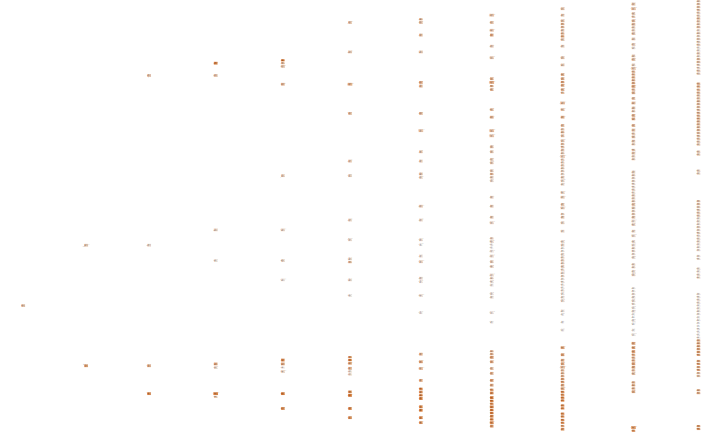

In [43]:
draw_tree(tree, X)

In [39]:
tree.predict(X[:1])

array([26.16842105])

In [40]:
X[:1]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98


In [44]:
tree = DecisionTreeRegressor(max_depth=3)

In [45]:
# start with a naive guess
prediction = y.mean()

In [47]:
gradient = y - y.mean()

In [48]:
gradient

0       1.467194
1      -0.932806
2      12.167194
3      10.867194
4      13.667194
         ...    
501    -0.132806
502    -1.932806
503     1.367194
504    -0.532806
505   -10.632806
Name: PRICE, Length: 506, dtype: float64

In [49]:
tree.fit(X, gradient)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=3,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [50]:
tree.predict(X)

array([  0.37239368,   0.37239368,  10.81603089,  10.81603089,
        10.81603089,   0.37239368,   0.37239368,  -5.39518256,
        -5.39518256,  -5.39518256,  -5.39518256,   0.37239368,
        -5.39518256,   0.37239368,   0.37239368,   0.37239368,
         0.37239368,  -5.39518256,   0.37239368,   0.37239368,
        -5.39518256,   0.37239368,  -5.39518256,  -5.39518256,
        -5.39518256,  -5.39518256,  -5.39518256,  -5.39518256,
         0.37239368,   0.37239368,  -5.39518256,   0.37239368,
        -5.39518256,  -5.39518256,  -5.39518256,   0.37239368,
         0.37239368,   0.37239368,   0.37239368,   0.37239368,
        10.81603089,   0.37239368,   0.37239368,   0.37239368,
         0.37239368,   0.37239368,   0.37239368,  -5.39518256,
        -5.39518256,  -5.39518256,   0.37239368,   0.37239368,
         0.37239368,   0.37239368,  -5.39518256,  10.81603089,
         0.37239368,   0.37239368,   0.37239368,   0.37239368,
         0.37239368,  -5.39518256,   0.37239368,   0.37

In [54]:
prediction -= tree.predict(X)

In [51]:
x = 10

In [52]:
x -= 5

In [53]:
x

5

In [57]:
gradient = y - prediction

In [58]:
tree.fit(X, gradient)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=3,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [59]:
tree.predict(X)

array([  0.74478735,   0.74478735,  21.63206177,  21.63206177,
        21.63206177,   0.74478735,   0.74478735, -10.79036512,
       -10.79036512, -10.79036512, -10.79036512,   0.74478735,
       -10.79036512,   0.74478735,   0.74478735,   0.74478735,
         0.74478735, -10.79036512,   0.74478735,   0.74478735,
       -10.79036512,   0.74478735, -10.79036512, -10.79036512,
       -10.79036512, -10.79036512, -10.79036512, -10.79036512,
         0.74478735,   0.74478735, -10.79036512,   0.74478735,
       -10.79036512, -10.79036512, -10.79036512,   0.74478735,
         0.74478735,   0.74478735,   0.74478735,   0.74478735,
        21.63206177,   0.74478735,   0.74478735,   0.74478735,
         0.74478735,   0.74478735,   0.74478735, -10.79036512,
       -10.79036512, -10.79036512,   0.74478735,   0.74478735,
         0.74478735,   0.74478735, -10.79036512,  21.63206177,
         0.74478735,   0.74478735,   0.74478735,   0.74478735,
         0.74478735, -10.79036512,   0.74478735,   0.74

In [60]:
prediction -= tree.predict(X)

In [61]:
prediction

array([ 21.4156253 ,  21.4156253 ,  -9.91528633,  -9.91528633,
        -9.91528633,  21.4156253 ,  21.4156253 ,  38.71835401,
        38.71835401,  38.71835401,  38.71835401,  21.4156253 ,
        38.71835401,  21.4156253 ,  21.4156253 ,  21.4156253 ,
        21.4156253 ,  38.71835401,  21.4156253 ,  21.4156253 ,
        38.71835401,  21.4156253 ,  38.71835401,  38.71835401,
        38.71835401,  38.71835401,  38.71835401,  38.71835401,
        21.4156253 ,  21.4156253 ,  38.71835401,  21.4156253 ,
        38.71835401,  38.71835401,  38.71835401,  21.4156253 ,
        21.4156253 ,  21.4156253 ,  21.4156253 ,  21.4156253 ,
        -9.91528633,  21.4156253 ,  21.4156253 ,  21.4156253 ,
        21.4156253 ,  21.4156253 ,  21.4156253 ,  38.71835401,
        38.71835401,  38.71835401,  21.4156253 ,  21.4156253 ,
        21.4156253 ,  21.4156253 ,  38.71835401,  -9.91528633,
        21.4156253 ,  21.4156253 ,  21.4156253 ,  21.4156253 ,
        21.4156253 ,  38.71835401,  21.4156253 ,  21.41

In [62]:
tree.predict(X)

array([  0.74478735,   0.74478735,  21.63206177,  21.63206177,
        21.63206177,   0.74478735,   0.74478735, -10.79036512,
       -10.79036512, -10.79036512, -10.79036512,   0.74478735,
       -10.79036512,   0.74478735,   0.74478735,   0.74478735,
         0.74478735, -10.79036512,   0.74478735,   0.74478735,
       -10.79036512,   0.74478735, -10.79036512, -10.79036512,
       -10.79036512, -10.79036512, -10.79036512, -10.79036512,
         0.74478735,   0.74478735, -10.79036512,   0.74478735,
       -10.79036512, -10.79036512, -10.79036512,   0.74478735,
         0.74478735,   0.74478735,   0.74478735,   0.74478735,
        21.63206177,   0.74478735,   0.74478735,   0.74478735,
         0.74478735,   0.74478735,   0.74478735, -10.79036512,
       -10.79036512, -10.79036512,   0.74478735,   0.74478735,
         0.74478735,   0.74478735, -10.79036512,  21.63206177,
         0.74478735,   0.74478735,   0.74478735,   0.74478735,
         0.74478735, -10.79036512,   0.74478735,   0.74

In [65]:
gradient = y - prediction

In [66]:
gradient

0       2.584375
1       0.184375
2      44.615286
3      43.315286
4      46.115286
         ...    
501     0.984375
502    -0.815625
503    33.815286
504     0.584375
505    -9.515625
Name: PRICE, Length: 506, dtype: float64

In [67]:
learning_rate = .01

In [69]:
prediction -= (gradient * learning_rate)

In [70]:
prediction

0      21.389782
1      21.413782
2     -10.361439
3     -10.348439
4     -10.376439
         ...    
501    21.405782
502    21.423782
503   -10.253439
504    21.409782
505    21.510782
Name: PRICE, Length: 506, dtype: float64

In [71]:
from sklearn.ensemble import GradientBoostingRegressor

In [72]:
gbm = GradientBoostingRegressor()

In [73]:
gbm

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [74]:
gbm.fit(X, y)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [76]:
df['Prediction'] = gbm.predict(X)

In [77]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE,Prediction
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,25.907726
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,21.963202
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,33.927122
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,34.145281
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,35.412679


In [78]:
gbm.score(X, y)

0.9761405838418584

In [79]:
gbm.get_params()

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'ls',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'presort': 'deprecated',
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [80]:
prediction = y.mean()

In [82]:
gradient = y - prediction

In [83]:
tree.fit(X, gradient)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=3,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [85]:
prediction -= tree.predict(X)

In [86]:
prediction

array([22.16041265, 22.16041265, 11.71677544, 11.71677544, 11.71677544,
       22.16041265, 22.16041265, 27.92798889, 27.92798889, 27.92798889,
       27.92798889, 22.16041265, 27.92798889, 22.16041265, 22.16041265,
       22.16041265, 22.16041265, 27.92798889, 22.16041265, 22.16041265,
       27.92798889, 22.16041265, 27.92798889, 27.92798889, 27.92798889,
       27.92798889, 27.92798889, 27.92798889, 22.16041265, 22.16041265,
       27.92798889, 22.16041265, 27.92798889, 27.92798889, 27.92798889,
       22.16041265, 22.16041265, 22.16041265, 22.16041265, 22.16041265,
       11.71677544, 22.16041265, 22.16041265, 22.16041265, 22.16041265,
       22.16041265, 22.16041265, 27.92798889, 27.92798889, 27.92798889,
       22.16041265, 22.16041265, 22.16041265, 22.16041265, 27.92798889,
       11.71677544, 22.16041265, 22.16041265, 22.16041265, 22.16041265,
       22.16041265, 27.92798889, 22.16041265, 22.16041265, 11.71677544,
       22.16041265, 22.16041265, 22.16041265, 22.16041265, 22.16

In [87]:
gradient = y - prediction

In [88]:
gradient

0       1.839587
1      -0.560413
2      22.983225
3      21.683225
4      24.483225
         ...    
501     0.239587
502    -1.560413
503    12.183225
504    -0.160413
505   -10.260413
Name: PRICE, Length: 506, dtype: float64

In [89]:
tree.fit(X, gradient)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=3,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [91]:
prediction[:5]

array([22.16041265, 22.16041265, 11.71677544, 11.71677544, 11.71677544])

In [92]:
y[:5]

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: PRICE, dtype: float64

In [93]:
prediction -= tree.predict(X)

In [94]:
prediction

array([ 21.4156253 ,  21.4156253 ,  -9.91528633,  -9.91528633,
        -9.91528633,  21.4156253 ,  21.4156253 ,  38.71835401,
        38.71835401,  38.71835401,  38.71835401,  21.4156253 ,
        38.71835401,  21.4156253 ,  21.4156253 ,  21.4156253 ,
        21.4156253 ,  38.71835401,  21.4156253 ,  21.4156253 ,
        38.71835401,  21.4156253 ,  38.71835401,  38.71835401,
        38.71835401,  38.71835401,  38.71835401,  38.71835401,
        21.4156253 ,  21.4156253 ,  38.71835401,  21.4156253 ,
        38.71835401,  38.71835401,  38.71835401,  21.4156253 ,
        21.4156253 ,  21.4156253 ,  21.4156253 ,  21.4156253 ,
        -9.91528633,  21.4156253 ,  21.4156253 ,  21.4156253 ,
        21.4156253 ,  21.4156253 ,  21.4156253 ,  38.71835401,
        38.71835401,  38.71835401,  21.4156253 ,  21.4156253 ,
        21.4156253 ,  21.4156253 ,  38.71835401,  -9.91528633,
        21.4156253 ,  21.4156253 ,  21.4156253 ,  21.4156253 ,
        21.4156253 ,  38.71835401,  21.4156253 ,  21.41

In [96]:
gradient = y - prediction

In [97]:
tree.fit(X, gradient)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=3,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [99]:
prediction[:5]

array([21.4156253 , 21.4156253 , -9.91528633, -9.91528633, -9.91528633])

In [100]:
prediction -= tree.predict(X)

In [101]:
prediction

array([  19.92605059,   19.92605059,  -53.17940987,  -53.17940987,
        -53.17940987,   19.92605059,   19.92605059,   60.29908426,
         60.29908426,   60.29908426,   60.29908426,   19.92605059,
         60.29908426,   19.92605059,   19.92605059,   19.92605059,
         19.92605059,   60.29908426,   19.92605059,   19.92605059,
         60.29908426,   19.92605059,   60.29908426,   60.29908426,
         60.29908426,   60.29908426,   60.29908426,   60.29908426,
         19.92605059,   19.92605059,   60.29908426,   19.92605059,
         60.29908426,   60.29908426,   60.29908426,   19.92605059,
         19.92605059,   19.92605059,   19.92605059,   19.92605059,
        -53.17940987,   19.92605059,   19.92605059,   19.92605059,
         19.92605059,   19.92605059,   19.92605059,   60.29908426,
         60.29908426,   60.29908426,   19.92605059,   19.92605059,
         19.92605059,   19.92605059,   60.29908426,  -53.17940987,
         19.92605059,   19.92605059,   19.92605059,   19.92605

In [102]:
prediction = y.mean()

In [103]:
gradient = y - prediction

In [104]:
gradient

0       1.467194
1      -0.932806
2      12.167194
3      10.867194
4      13.667194
         ...    
501    -0.132806
502    -1.932806
503     1.367194
504    -0.532806
505   -10.632806
Name: PRICE, Length: 506, dtype: float64

In [105]:
tree.fit(X, gradient)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=3,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [107]:
prediction[:5]

TypeError: 'float' object is not subscriptable

In [108]:
prediction += tree.predict(X)

In [109]:
prediction[:5]

array([22.9052    , 22.9052    , 33.34883721, 33.34883721, 33.34883721])

In [110]:
gradient = y - prediction

In [111]:
gradient

0       1.094800
1      -1.305200
2       1.351163
3       0.051163
4       2.851163
         ...    
501    -0.505200
502    -2.305200
503    -9.448837
504    -0.905200
505   -11.005200
Name: PRICE, Length: 506, dtype: float64

In [112]:
tree.fit(X, gradient)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=3,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [114]:
prediction += tree.predict(X)

In [117]:
gradient = y - prediction

In [118]:
tree.fit(X, gradient)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=3,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [120]:
prediction += tree.predict(X)

In [123]:
y[:6]

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
5    28.7
Name: PRICE, dtype: float64

In [124]:
prediction[:6]

array([28.65131748, 22.82816666, 33.39272232, 35.7751506 , 35.7751506 ,
       26.67962533])